In [1]:
#Import Libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
G = nx.DiGraph()

### Wikipedia Vote



Data obtained from the Wikipedia Vote Network dataset, part of the Stanford Network Analysis Project (SNAP): https://snap.stanford.edu/data/wiki-Vote.html

In [2]:
#Upload the dataset
file_path = "/content/wiki-Vote.txt"

In [3]:
# Read the file and populate the graph
with open(file_path, "r") as file:
    for line in file:
        if line.startswith("#"):
            continue
        from_node, to_node = map(int, line.strip().split())
        G.add_edge(from_node, to_node)

# Basic graph information
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph has 7115 nodes and 103689 edges.


In [4]:
# Visualize a subgraph
subgraph_nodes = list(G.nodes)[:200]  # Select a subset of the first 500 nodes
subgraph = G.subgraph(subgraph_nodes)

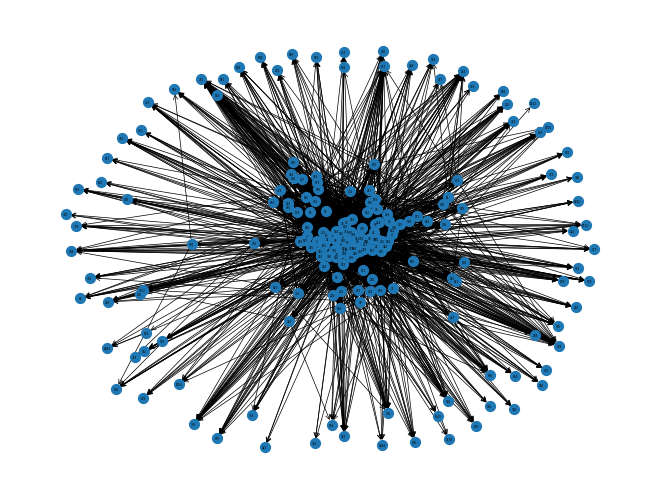

In [5]:
nx.draw(subgraph,
        with_labels=True,
        node_size=50,
        font_size=2,
        width=0.5,
        arrowstyle="->",
        arrowsize=8)


In [6]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[] for i in range(vertices)]

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def DFSUtility(self, v, visited):
        visited[v] = True
        print(v, end=" ")
        for i in self.graph[v]:
            if not visited[i]:
              self.DFSUtility(i, visited)

    def fillStack(self, v, visited, stack):
        visited[v] = True
        for i in self.graph[v]:
            if not visited[i]:
              self.fillStack(i, visited, stack)
        stack.append(v)

    def getTranspose(self):
        g = Graph(self.V)
        for i in range(self.V):
            for j in self.graph[i]:
              g.addEdge(j, i)
        return g

    def kosarajuSCC(self):
        stack = []
        visited = [False] * self.V
        for i in range(self.V):
            if not visited[i]:
              self.fillStack(i, visited, stack)
        transpose = self.getTranspose()
        visited = [False] * self.V
        while stack:
            i = stack.pop()
            if not visited[i]:
                transpose.DFSUtility(i, visited)
                print("")

In [7]:
def convert_networkx_to_graph(nx_graph):
    # Map the nodes of the nx_graph to integers
    node_mapping = {node: idx for idx, node in enumerate(nx_graph.nodes())}
    num_vertices = len(node_mapping)  # Number of vertices is the size of the mapping

    # Initialize your Graph object
    g = Graph(num_vertices)

    # Add edges using the mapped indices
    for u, v in nx_graph.edges():
        g.addEdge(node_mapping[u], node_mapping[v])

    return g

In [8]:
print('The Strongly Connected Components are:')

kos_graph = convert_networkx_to_graph(subgraph)

# Perform Kosaraju's algorithm
kos_graph.kosarajuSCC()

The Strongly Connected Components are:
9 
3 
2 
1 4 5 6 12 8 7 11 14 16 15 34 19 26 18 20 17 65 130 23 39 33 70 27 41 46 92 109 37 69 72 22 74 48 124 119 121 57 120 40 44 32 25 117 63 153 154 143 86 141 129 38 150 68 182 183 60 118 61 77 59 144 64 58 87 85 108 152 156 191 83 126 81 93 99 147 168 149 94 142 113 67 148 163 198 102 103 135 127 194 101 195 21 105 47 160 24 188 196 134 181 184 106 140 75 73 30 36 98 199 52 84 197 110 112 
55 
13 
174 
80 
171 
79 
53 
42 
139 
125 
100 
115 
176 
90 
193 
175 
161 
179 
35 
178 
177 
91 
49 
122 
76 
31 
78 
66 
172 
145 
158 
50 
45 
10 
189 
166 
71 
111 
169 
28 
192 
190 
186 
185 
138 
170 
43 
167 
165 164 
162 
157 
51 
56 
159 
107 
187 
146 
62 
82 
133 
54 
173 
155 
89 
95 
128 
96 
104 
180 
116 
88 
151 
114 
136 
131 
132 
123 
29 
137 
97 
0 


#### Visualize Kosaraju Results

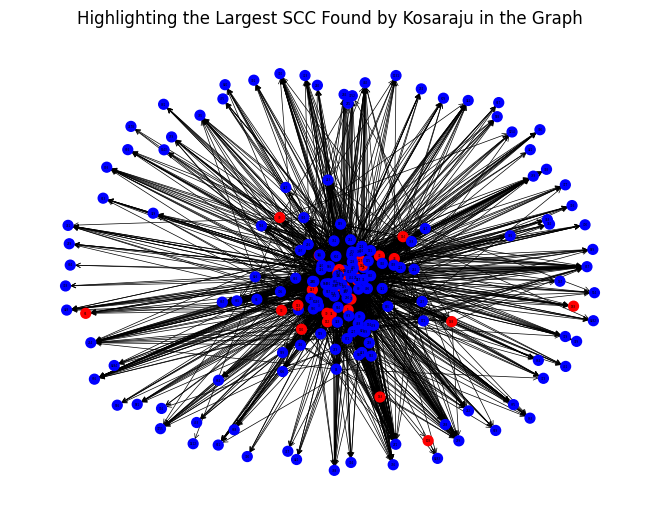

In [9]:
largest_scc = {1, 4, 5, 6, 7, 8, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 44, 46, 47, 48, 52, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 77, 81, 83, 84, 85, 86, 87, 92, 93, 94, 98, 99, 101, 102, 103, 105, 106, 108, 109, 110, 112, 113, 117, 118, 119, 120, 121, 124, 126, 127, 129, 130, 134, 135, 140, 141, 142, 143, 144, 147, 148, 149, 150, 152, 153, 154, 156, 160, 163, 168, 181, 182, 183, 184, 188, 191, 194, 195, 196, 197, 198, 199}


color_map = []
for node in subgraph:
    if node in largest_scc:
        color_map.append('red')  # Red nodes in the largest SCC
    else:
        color_map.append('blue')


nx.draw(subgraph,
        with_labels=True,
        node_size=50,
        font_size=2,
        width=0.5,
        arrowstyle="->",
        arrowsize=8,
        node_color=color_map)

plt.title("Highlighting the Largest SCC Found by Kosaraju in the Graph")
plt.show()


In [10]:
len(largest_scc)

115